In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path

In [2]:
# Read the data from the tsla_historical.csv file into a Pandas DataFrame
df_tsla = pd.read_csv(
    Path("tsla_historical.csv")
)
df_tsla.head()

,time,close
0,2018-01-02 09:30:00-05:00,315.870
1,2018-01-02 09:45:00-05:00,317.500
2,2018-01-02 10:00:00-05:00,318.035
3,2018-01-02 10:15:00-05:00,317.470
4,2018-01-02 10:30:00-05:00,316.875


In [3]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21279 entries, 0 to 21278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    21279 non-null  object 
 1   close   21279 non-null  float64
dtypes: float64(1), object(1)
memory usage: 332.6+ KB


In [4]:
# Transform the time column to a datetime data type
df_tsla["time"] = pd.to_datetime(
    df_tsla["time"],
    infer_datetime_format = True,
    utc = True    
)
df_tsla.set_index("time", inplace=True)
df_tsla.head()

,close
time,
2018-01-02 14:30:00+00:00,315.870
2018-01-02 14:45:00+00:00,317.500
2018-01-02 15:00:00+00:00,318.035
2018-01-02 15:15:00+00:00,317.470
2018-01-02 15:30:00+00:00,316.875


<AxesSubplot: title={'center': 'Historial TSLA Closing Prices'}, xlabel='time'>

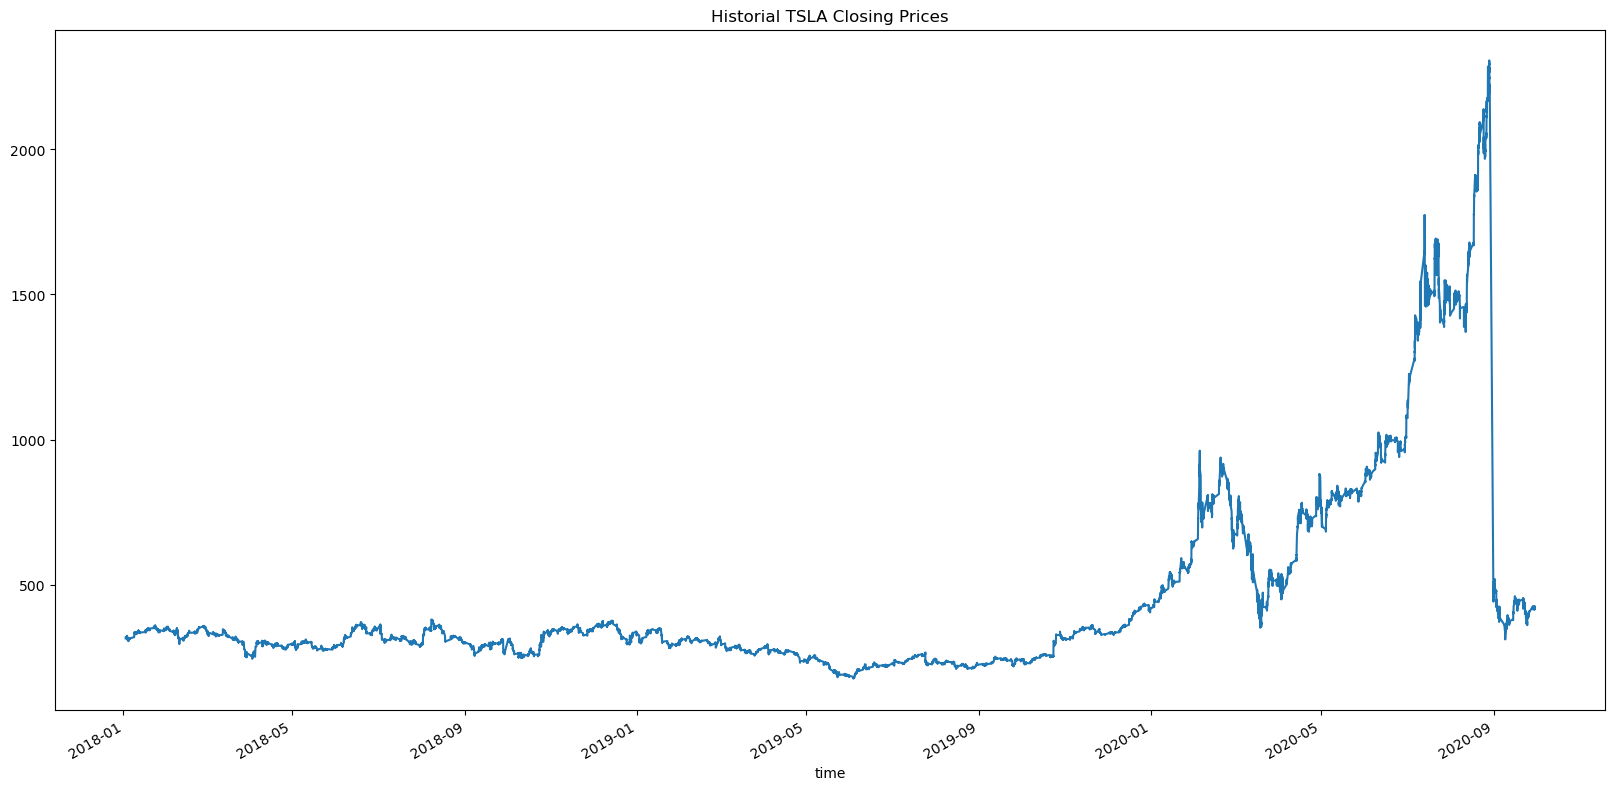

In [5]:
# Plot the closing price of TSLA
df_tsla["close"].plot(
    title="Historial TSLA Closing Prices", 
    figsize=[20, 10]
)

<AxesSubplot: title={'center': '2020 TSLA Closing Prices'}, xlabel='time'>

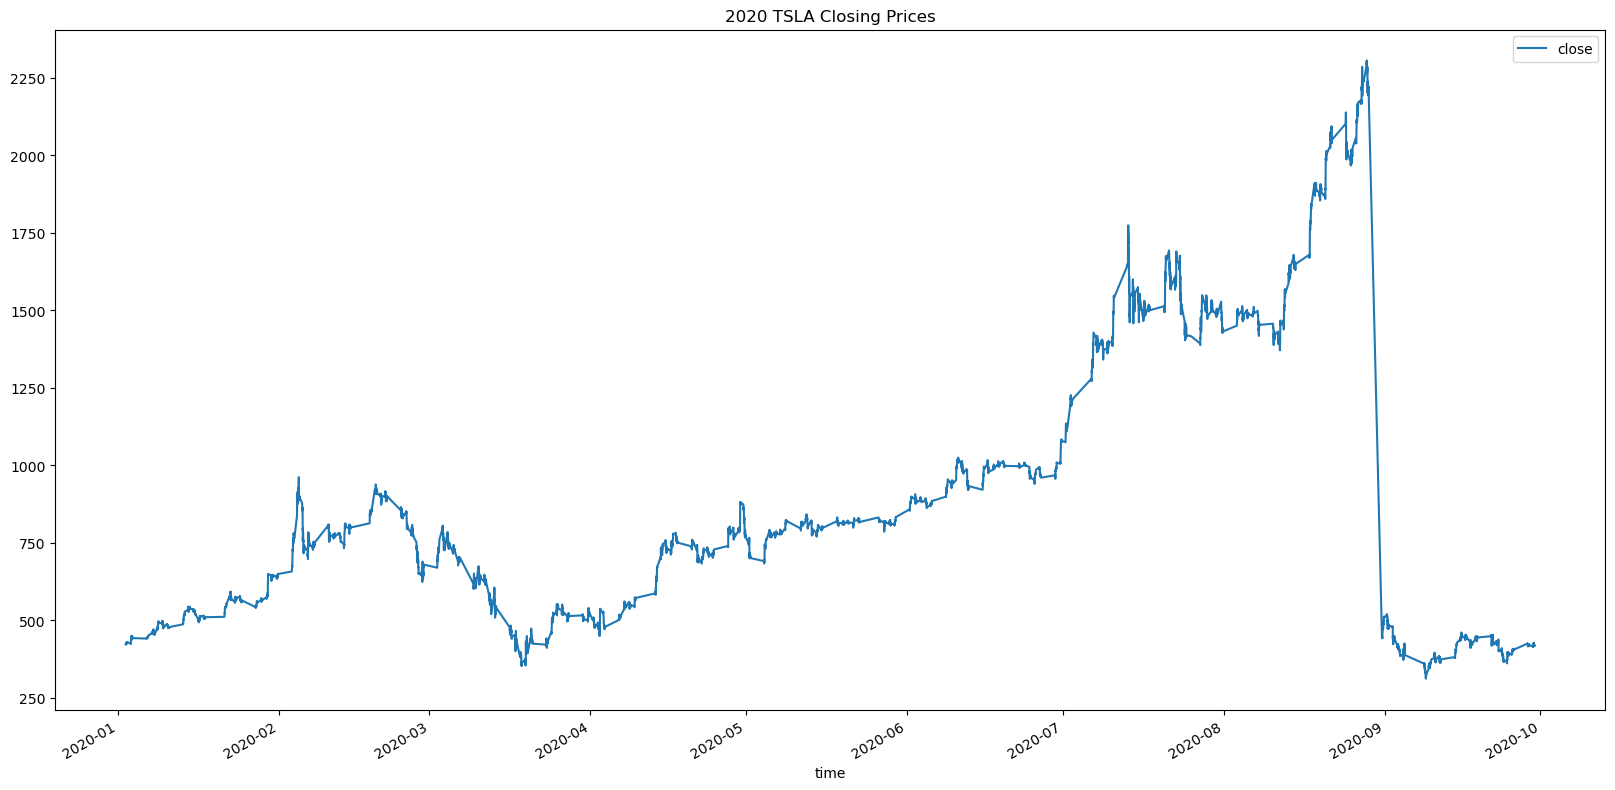

In [6]:
# Select and plot the TSLA closing prices from 2020
df_tsla.loc["2020"].plot(
    title="2020 TSLA Closing Prices", 
    figsize=(20, 10)


)

<AxesSubplot: xlabel='time'>

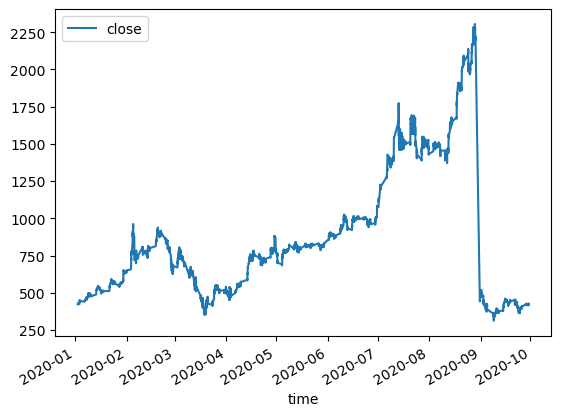

In [7]:
# Select and plot the TSLA closing prices from 2020 using DatetimeIndex attributes
df_tsla.loc[df_tsla.index.year == 2020].plot()

<AxesSubplot: xlabel='time'>

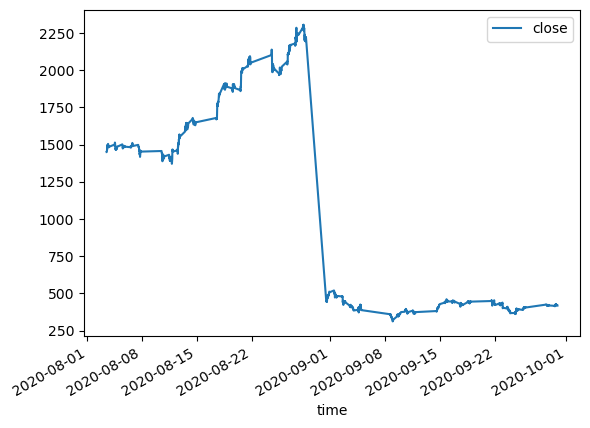

In [8]:
# Select and plot the TSLA closing prices from August and September 2020
df_tsla.loc["2020-08" : "2020-09"].plot()

<AxesSubplot: xlabel='time'>

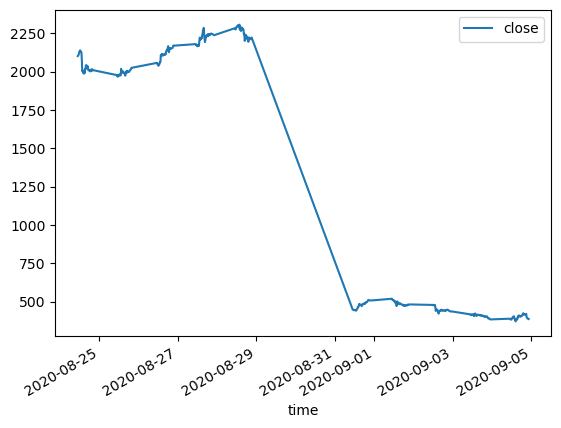

In [9]:
# Select and plot the TSLA closing prices from August 22 to September 5, 2020
df_tsla.loc["2020-08-22" : "2020-09-05"].plot()

In [10]:
from openbb_terminal.sdk import openbb

%matplotlib inline

Loading Daily data for TSLA with starting period 2020-03-02.

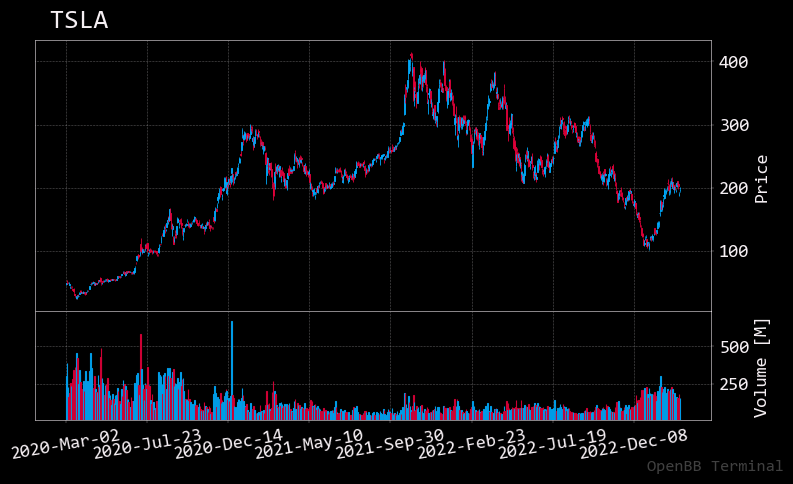

In [11]:
openbb.stocks.candle("TSLA")

In [13]:
tsla_monthly = openbb.stocks.load(
        symbol = 'TSLA',
        start_date = '2018-01-01',
        monthly = True)
tsla_monthly.head()

Loading Monthly data for TSLA with starting period 2018-01-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2018-01-01,20.799999,24.033333,20.378668,23.620667,23.620667,1864072500,0.0,0.0
2018-02-01,23.400000,23.999332,19.650667,22.870667,22.870667,1637850000,0.0,0.0
2018-03-01,23.000668,23.244667,16.547333,17.742001,17.742001,2359027500,0.0,0.0
2018-04-01,17.084000,20.633333,16.306000,19.593332,19.593332,2854662000,0.0,0.0
2018-05-01,19.567333,20.865999,18.228001,18.982000,18.982000,2333671500,0.0,0.0


In [24]:
tsla_data = openbb.stocks.load("TSLA", start_date = "2018-01-01")
tsla_data

Loading Daily data for TSLA with starting period 2018-01-02.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,0.0,0.0
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,0.0,0.0
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,0.0,0.0
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,0.0,0.0
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300,0.0,0.0
2023-02-28,210.589996,211.229996,203.750000,205.710007,205.710007,153144900,0.0,0.0
2023-03-01,206.210007,207.199997,198.520004,202.770004,202.770004,156852800,0.0,0.0


In [25]:
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1301 entries, 2018-01-02 to 2023-03-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1301 non-null   float64
 1   High          1301 non-null   float64
 2   Low           1301 non-null   float64
 3   Close         1301 non-null   float64
 4   Adj Close     1301 non-null   float64
 5   Volume        1301 non-null   int64  
 6   Dividends     1301 non-null   float64
 7   Stock Splits  1301 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 91.5 KB


Loading Daily data for TSLA with starting period 2018-01-02.

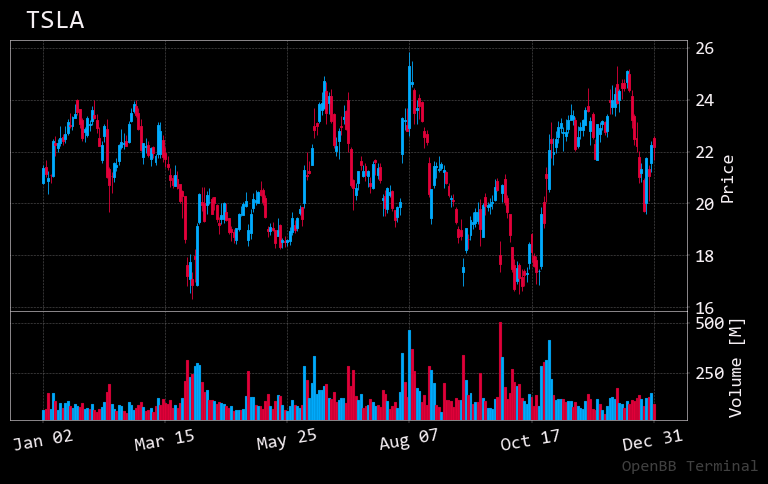

In [27]:
openbb.stocks.candle("TSLA", start_date = "2018-01-01", end_date = "2019-01-01")